## ML practice using the Breast Cancer Dataset

Ben Sturm <br/>
May 7, 2019

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [6]:
cancer = load_breast_cancer()

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=1)

In [12]:
print(X_train[0,:])
print(y_train[0])

[9.436e+00 1.832e+01 5.982e+01 2.786e+02 1.009e-01 5.956e-02 2.710e-02
 1.406e-02 1.506e-01 6.959e-02 5.079e-01 1.247e+00 3.267e+00 3.048e+01
 6.836e-03 8.982e-03 2.348e-02 6.565e-03 1.942e-02 2.713e-03 1.202e+01
 2.502e+01 7.579e+01 4.396e+02 1.333e-01 1.049e-01 1.144e-01 5.052e-02
 2.454e-01 8.136e-02]
1


In [13]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [14]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

I will first try out logistic regression on this dataset.

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
logreg = LogisticRegression().fit(X_train,y_train)

/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [18]:
print("Training set score: {:.3f}".format(logreg.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test,y_test)))

Training set score: 0.960
Test set score: 0.944


I'm now going to plot the confusion matrix for this classifier

In [19]:
y_test_pred = logreg.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix

In [21]:
confusion = confusion_matrix(y_test,y_test_pred)
print("Confusion matrix: \n{}".format(confusion))

Confusion matrix: 
[[48  5]
 [ 3 87]]


The top row refers to the actual class being class 0, whereas the bottom row refers to the actual class being class 1.  The left columns refers to the prediction being class 0 (negative class) and the right colums refers the the prediction being class 1 (positive class).

In [23]:
print("The accuracy is {:.3f}".format((48+87)/(48+5+3+87)))
print("The precision is {:.3f}".format(87/(87+3)))
print("The recall is {:.3f}".format(87/(87+5)))

The accuracy is 0.944
The precision is 0.967
The recall is 0.946


Let's play with the regularization term C a bit.

In [24]:
logreg10 = LogisticRegression(C=10).fit(X_train,y_train)

/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
print("Logistic Regression with C=10")
print("Training set score: {:.3f}".format(logreg10.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg10.score(X_test,y_test)))

Logistic Regression with C=10
Training set score: 0.967
Test set score: 0.951


In [27]:
logreg100 = LogisticRegression(C=100).fit(X_train,y_train)

/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [28]:
print("Logistic Regression with C=100")
print("Training set score: {:.3f}".format(logreg100.score(X_train,y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test,y_test)))

Logistic Regression with C=100
Training set score: 0.977
Test set score: 0.958


Now trying out Grid Search CV to find the best value for C.

In [29]:
from sklearn.model_selection import GridSearchCV

In [31]:
param_grid = {'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000]}

In [32]:
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

In [33]:
grid_search.fit(X_train, y_train)

/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/linear_model/lo

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [34]:
print("Test set score: {:.3f}".format(grid_search.score(X_test,y_test)))

Test set score: 0.951


In [36]:
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Best cross-validation score: 0.960
Best parameters: {'C': 1000}


In [37]:
grid_search.cv_results_

/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **wa

{'mean_fit_time': array([0.00287409, 0.00276103, 0.00279117, 0.00399876, 0.00431337,
        0.00510273, 0.00489883]),
 'std_fit_time': array([0.00118532, 0.0007744 , 0.00019191, 0.0002819 , 0.0006446 ,
        0.00096292, 0.00080377]),
 'mean_score_time': array([0.00037704, 0.00027585, 0.00023942, 0.00023603, 0.0002408 ,
        0.00022206, 0.00024376]),
 'std_score_time': array([1.54070845e-04, 5.65459310e-05, 1.53311860e-05, 1.37449913e-05,
        3.19420396e-05, 2.74999063e-06, 2.12861731e-05]),
 'param_C': masked_array(data=[0.001, 0.01, 0.1, 1, 10, 100, 1000],
              mask=[False, False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 0.001},
  {'C': 0.01},
  {'C': 0.1},
  {'C': 1},
  {'C': 10},
  {'C': 100},
  {'C': 1000}],
 'split0_test_score': array([0.89534884, 0.91860465, 0.94186047, 0.94186047, 0.94186047,
        0.95348837, 0.95348837]),
 'split1_test_score': array([0.90697674, 0.91860465, 0.91860465, 0.9418

Now I'm going to try a DecisionTreeClassifier on this dataset

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [40]:
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


Looks like we are overfitting, so I'm going to construct a tree by adding a pre-pruning step (e.g. max_depth)

In [43]:
tree_md4 = DecisionTreeClassifier(max_depth=4, random_state=0)
tree_md4.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [44]:
print("Decision Tree with max_depth=4")
print("Accuracy on training set: {:.3f}".format(tree_md4.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree_md4.score(X_test, y_test)))

Decision Tree with max_depth=4
Accuracy on training set: 0.981
Accuracy on test set: 0.937


I'd like to first visualize the original tree.

In [45]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant","benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

In [50]:
import graphviz

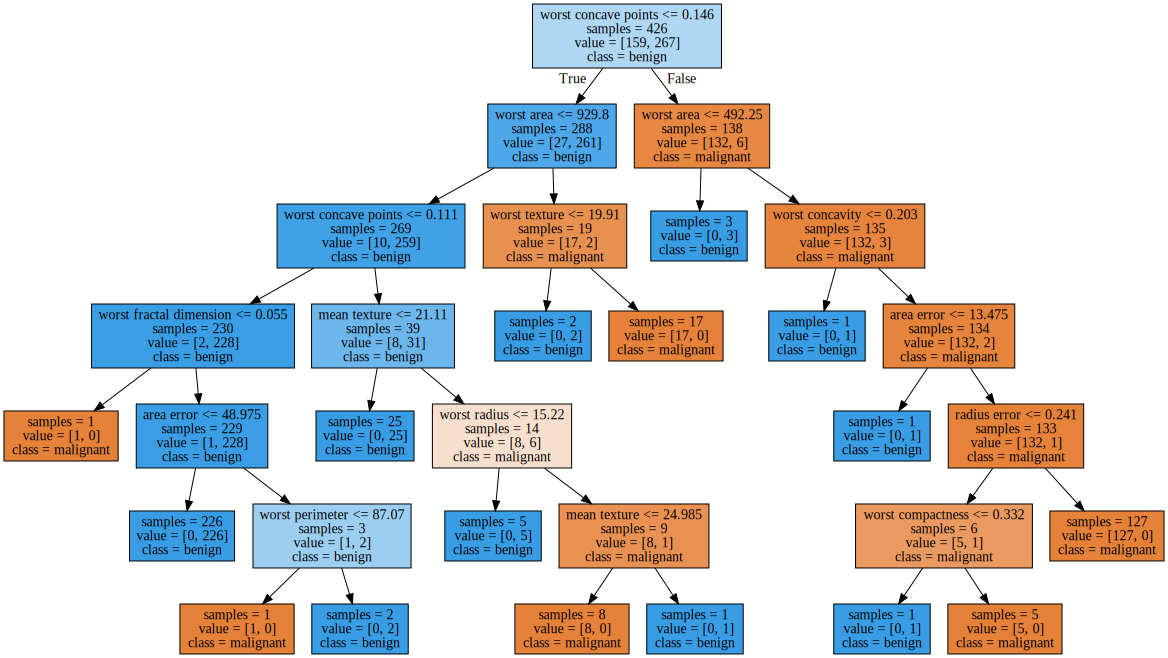

In [52]:
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Now visualizing the regularized tree

In [53]:
export_graphviz(tree_md4, out_file="tree_md4.dot", class_names=["malignant","benign"],
               feature_names=cancer.feature_names, impurity=False, filled=True)

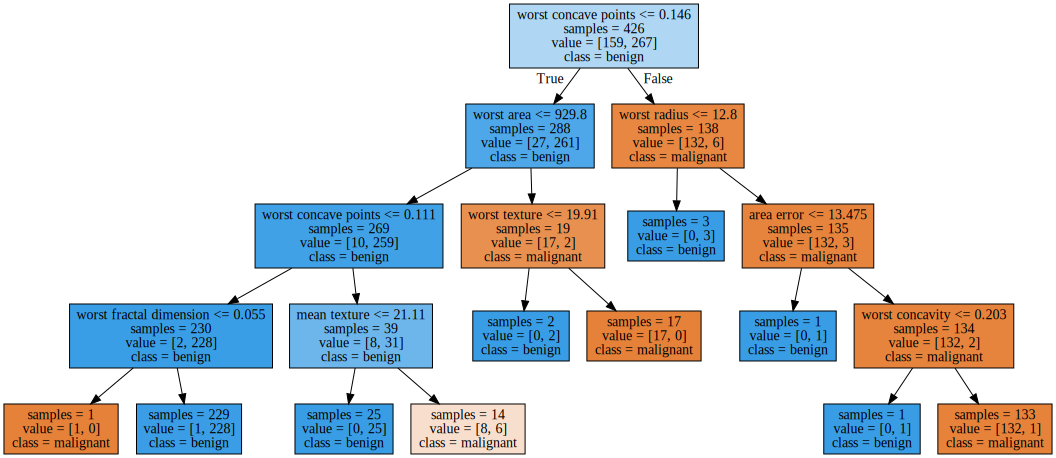

In [54]:
with open("tree_md4.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

Let's try out GridSearchCV on the DecisionTreeClassifier.  The two hyperparameters I'm going to play with are max_depth and the min_samples_split.

In [65]:
param_grid = {'max_depth':[3,4,5,6,7,8,9,10],'min_samples_split':[2,4,6,8,10,12,14]}

In [66]:
# %load 32-36
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10], 'min_samples_split': [2, 4, 6, 8, 10, 12, 14]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [67]:
print("Test set score: {:.3f}".format(grid_search.score(X_test,y_test)))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Test set score: 0.923
Best cross-validation score: 0.939
Best parameters: {'max_depth': 5, 'min_samples_split': 2}


Now I'm going to try out a RandomForestClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
forest = RandomForestClassifier(n_estimators=10, random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [71]:
print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


Lets try increasing the number of trees to be 100.

In [73]:
forest100 = RandomForestClassifier(n_estimators=100, random_state=0)
forest100.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [74]:
print("Accuracy on training set: {:.3f}".format(forest100.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest100.score(X_test,y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.944


In [77]:
np.sqrt(len(cancer.feature_names))

5.477225575051661

In [81]:
param_grid = {'n_estimators':[10,20,100,200],'max_features':[3,5,7,9]}

In [84]:
grid_search = GridSearchCV(RandomForestClassifier(),param_grid,cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 100, 200], 'max_features': [3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [85]:
print("Test set score: {:.3f}".format(grid_search.score(X_test,y_test)))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Test set score: 0.951
Best cross-validation score: 0.972
Best parameters: {'max_features': 9, 'n_estimators': 100}


Now I'm going to try out Gradient Boosted Decision Trees

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=0,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [88]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.958


Let's try playing with a few of the hyperparameters

In [91]:
gbrt = GradientBoostingClassifier(random_state=1, max_depth=1)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=1,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [90]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.995
Accuracy on test set: 0.944


In [92]:
gbrt = GradientBoostingClassifier(random_state=1, learning_rate=0.01)
gbrt.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              n_iter_no_change=None, presort='auto', random_state=1,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [93]:
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


Let's test out using cross validation to see which model gives the best cross validation score

In [94]:
from sklearn.model_selection import cross_val_score

In [95]:
gbrt = GradientBoostingClassifier(random_state=0)

In [96]:
scores = cross_val_score(gbrt, X_train, y_train, cv=5)

In [99]:
print("Results using default values")
print("Cross-validation scores {}".format(scores))
print("Average cross-validation scores {}".format(scores.mean()))

Results using default values
Cross-validation scores [0.95348837 0.95348837 0.91764706 0.98823529 0.96428571]
Average cross-validation scores 0.9554289622825876


In [100]:
gbrt_md1 = GradientBoostingClassifier(random_state=1, max_depth=1)
scores = cross_val_score(gbrt_md1, X_train, y_train, cv=5)

In [101]:
print("Results using maximum_depth=1")
print("Cross-validation scores {}".format(scores))
print("Average cross-validation scores {}".format(scores.mean()))

Results using maximum_depth=1
Cross-validation scores [0.95348837 0.97674419 0.94117647 0.97647059 0.97619048]
Average cross-validation scores 0.9648140186307081


In [102]:
gbrt_lr01 = GradientBoostingClassifier(random_state=1, learning_rate=0.01)
scores = cross_val_score(gbrt_lr01, X_train, y_train, cv=5)

In [103]:
print("Results using maximum_depth=1")
print("Cross-validation scores {}".format(scores))
print("Average cross-validation scores {}".format(scores.mean()))

Results using maximum_depth=1
Cross-validation scores [0.89534884 0.94186047 0.92941176 0.97647059 0.94047619]
Average cross-validation scores 0.9367135691485897


Finally, let's try out GridSearchCV to see if we can find the best combination of max_depth and learning_rate.

In [104]:
param_grid = {'max_depth':[1,2,3,4,5],'learning_rate':[0.001,0.01,0.1,1,10,100]}

In [105]:
grid_search = GridSearchCV(GradientBoostingClassifier(random_state=0),param_grid,cv=5)
grid_search.fit(X_train, y_train)

/Users/bwsturm/anaconda/envs/labyakk/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [106]:
print("Test set score: {:.3f}".format(grid_search.score(X_test,y_test)))
print("Best cross-validation score: {:.3f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))

Test set score: 0.944
Best cross-validation score: 0.965
Best parameters: {'learning_rate': 0.1, 'max_depth': 1}
